In [3]:
# importing all the packages and naming them as per our convinience.
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import stats
from scipy.stats import probplot
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
import warnings
warnings.filterwarnings('ignore')


In [4]:
"""Build a simple linear regression model by performing EDA and do necessary transformations and select the best model using Python."""
"""2) Salary_hike -> Build a prediction model for Salary_hike"""

'2) Salary_hike -> Build a prediction model for Salary_hike'

In [5]:
# importing the data using pandas.
data=pd.read_csv('E:\SLR/Salary_Data.csv')
data

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
...,...,...
25,9.0,105582.0
26,9.5,116969.0
27,9.6,112635.0
28,10.3,122391.0


In [6]:
# creating a dataframe using pandas.
df=pd.DataFrame(data)
df

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
...,...,...
25,9.0,105582.0
26,9.5,116969.0
27,9.6,112635.0
28,10.3,122391.0


In [7]:
# Now, After creating the dataframe the main step is to explore throughout the data.
# this exploration of data is considered as one of the main steps in the data analysis.
# in univaiate data we have done hypothesis testing types to get the desired output.
# now the data which we got is bivariate data with two varaibles , so we have to perform EDA on the data and check the relationship between them

In [8]:
# info function gives us the raw information of data such as any null values, data types e.t.c.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


<AxesSubplot: xlabel='YearsExperience', ylabel='Density'>

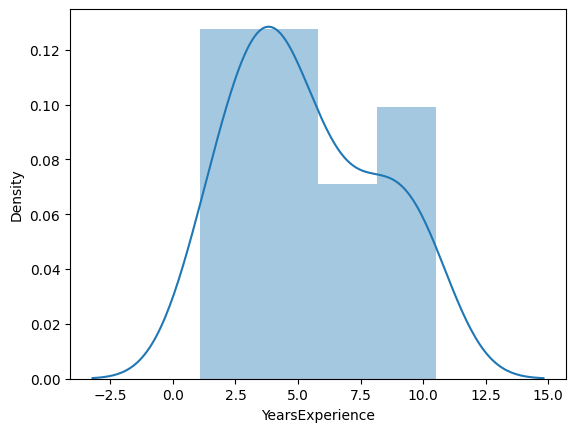

In [9]:
# we have previously used distplot to see that our data is folowing normal distribution or not
sns.distplot(df['YearsExperience'])

<AxesSubplot: xlabel='Salary', ylabel='Density'>

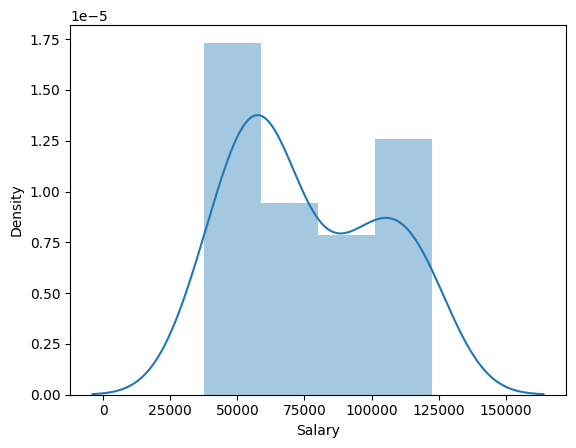

In [10]:
sns.distplot(df['Salary'])

array([[<AxesSubplot: title={'center': 'YearsExperience'}>,
        <AxesSubplot: title={'center': 'Salary'}>]], dtype=object)

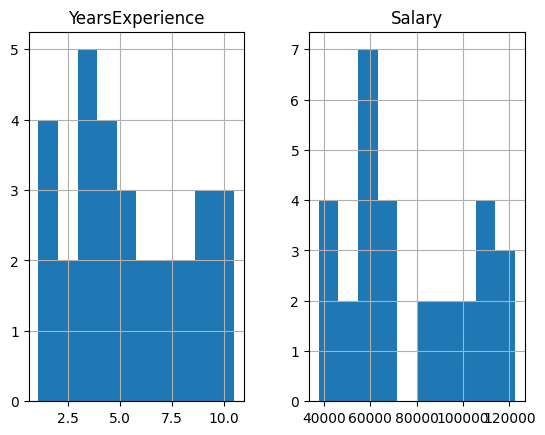

In [11]:
# histogram to check the distribution of data
df.hist()

<AxesSubplot: >

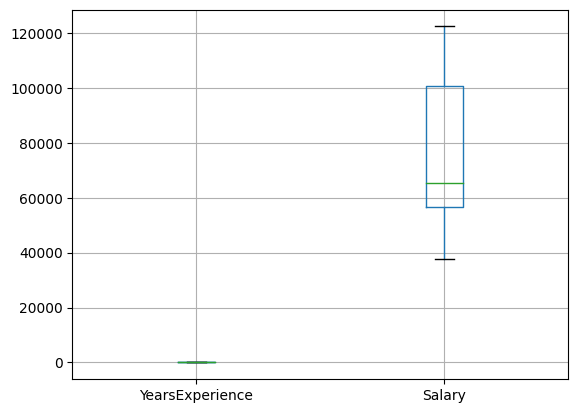

In [12]:
# boxplot will find out the outliers present in the data

df.boxplot()

# we can see  that there are no outliers in the data so we can continue the next eda process

In [13]:
# now we have to check the relation between the two variables

df.corr()

# we can see that there is a strong positive realtionship between Delivery Time and Sorting Time


,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


Text(0.5, 1.0, "Q-Q plot of 'YearsExperience'")

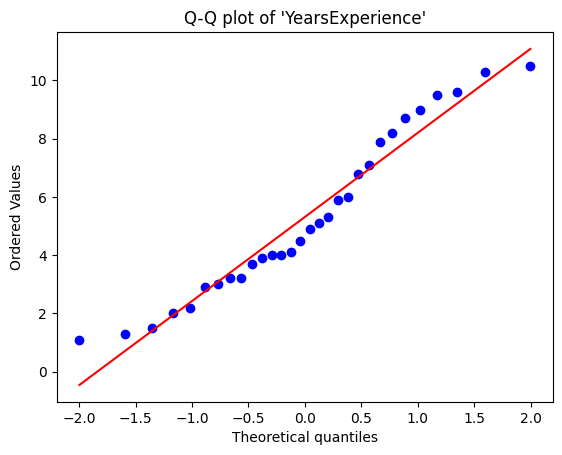

In [14]:
# Normal Q-Q plot of YearsExperience
probplot(df['YearsExperience'], plot=plt)
plt.title("Q-Q plot of 'YearsExperience'")

Text(0.5, 1.0, "Q-Q plot of 'Salary'")

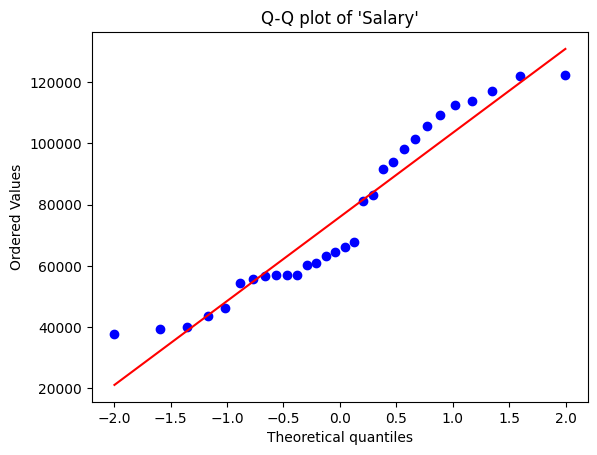

In [15]:
# Normal Q-Q plot of Salary variable
probplot(df['Salary'], plot=plt)
plt.title("Q-Q plot of 'Salary'")

<AxesSubplot: xlabel='YearsExperience', ylabel='Salary'>

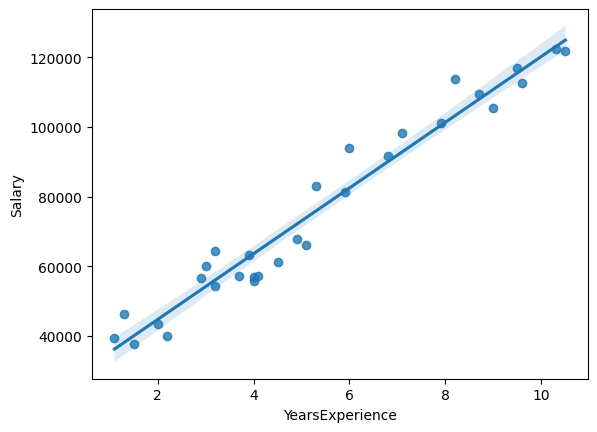

In [69]:
# plotting a regression plot to see where the actual data points lie on the plot
sns.regplot(x=df['YearsExperience'],y=df['Salary'])

In [18]:
# now let us denote what is our null hypothesis
Ho = 'Data is Normal'

# now let us denote what is our alternative hypothesis
Ha = 'Data is not Normal'


# Defining a shapiro test function with 5% significance value
alpha = 0.05
def normality_check(df):
    for columnName, columnData in df.iteritems():
        print("Shapiro test for {columnName}".format(columnName=columnName))
        res = stats.shapiro(columnData)
#         print(res)
        pValue = round(res[1], 2)
        
        if pValue > alpha:
            print("pvalue = {pValue} > {alpha}. We fail to reject Null Hypothesis. {Ho}".format(pValue=pValue, alpha=alpha, Ho=Ho))
        else:
            print("pvalue = {pValue} <= {alpha}. We reject Null Hypothesis. {Ha}".format(pValue=pValue, alpha=alpha, Ha=Ha))
        
normality_check(df)

# as the data is not normal we have to go for tranformation of data into normal form by using normalization process from preprocessing techniques

Shapiro test for YearsExperience
pvalue = 0.1 > 0.05. We fail to reject Null Hypothesis. Data is Normal
Shapiro test for Salary
pvalue = 0.02 <= 0.05. We reject Null Hypothesis. Data is not Normal


In [19]:
# normalizing the data using preprocessing techniques
from sklearn import preprocessing
df['YearsExperience'] = preprocessing.normalize(df[['YearsExperience']], axis=0)
df['Salary'] = preprocessing.normalize(df[['Salary']], axis=0)
df.head()

,YearsExperience,Salary
0,0.033464,0.089074
1,0.039549,0.104610
2,0.045633,0.085424
3,0.060844,0.098542
4,0.066928,0.090315


In [20]:
""" this time iam directly using ORDINARY LEAST SQUARE METHOD beacause its easy to get all the parameters with it"""
x=df["Salary"]
y=df["YearsExperience"]

' this time iam directly using ORDINARY LEAST SQUARE METHOD beacause its easy to get all the parameters with it'

In [27]:
# fitting the regression model using ordinary least square method
model=smf.ols("x~y",data=df).fit()

In [28]:
# Coefficient parameters i.e intercept and slope
model.params

Intercept    0.058395
y            0.703277
dtype: float64

In [29]:
# Pvalues and tvalues
model.tvalues, model.pvalues

(Intercept    11.346940
 y            24.950094
 dtype: float64,
 Intercept    5.511950e-12
 y            1.143068e-20
 dtype: float64)

In [24]:

# Rsquared and Rsquared adjusted values
model.rsquared , model.rsquared_adj

(0.9569566641435086, 0.9554194021486339)

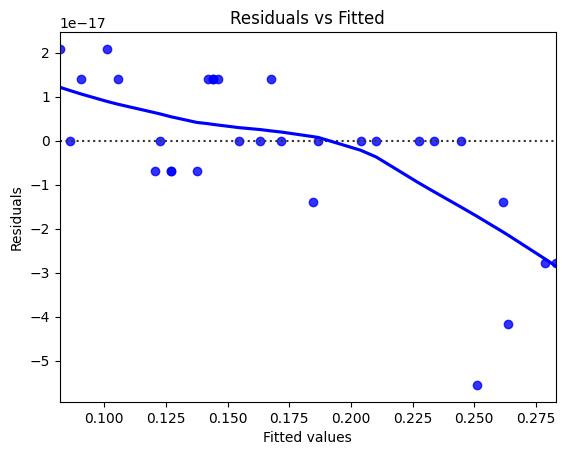

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

y_pred = model.predict(x)

residuals = y - y_pred

sns.residplot(x=y_pred, y=residuals, lowess=True, color="b")

plt.title('Residuals vs Fitted')
plt.xlabel('Fitted values')
plt.ylabel('Residuals')

plt.show()

In [40]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      x   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Mon, 22 May 2023   Prob (F-statistic):           1.14e-20
Time:                        10:36:57   Log-Likelihood:                 88.510
No. Observations:                  30   AIC:                            -173.0
Df Residuals:                      28   BIC:                            -170.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0584      0.005     11.347      0.000       0.048       0.069
y              0.7033      0.028     24.950      0.000       0.646       0.761
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.569
Skew:                           0.363   Prob(JB):                        0.456
Kurtosis:                       2.147   Cond. No.                         12.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [44]:
#make a table containing R^2-adj value for each prepared model.
r2_adj={'Prep_Models':['Model'],'Rsquared_adj':[model.rsquared]}
table=pd.DataFrame(r2_adj)
table
# 95% is considered as one of the best accuracy score to this dataset by simple linear regression model

,Prep_Models,Rsquared_adj
0,Model,0.956957
